![dsc-logo](https://raw.githubusercontent.com/divyake/Cysec-Hacktoberfest/dcc84465cfcff73981f8fcb5c8fe3b1710c007e1/assets/logo.svg)

# Welcome to the AI Hacktoberfest for Developer Students Club IEM

```python
Hello World !

from AI import ForestFirePredictions
```

<img src='https://upload.wikimedia.org/wikipedia/commons/d/d8/Deerfire_high_res_edit.jpg' width='1200px' style="vertical-align:middle"/>

# Objective 

This Jupyter Notebook will help you get started with the Submissions and you can find details of this on our github repository [AI Hacktoberfest](https://github.com/dsc-iem/AI-Hacktoberfest). For details on submission procedure, view [this file](https://github.com/dsc-iem/AI-Hacktoberfest/blob/master/CONTRIBUTING.md). Also you can view a [brief description of the Dataset Features](https://github.com/dsc-iem/AI-Hacktoberfest/blob/master/README.md).

Forest Fires help in the natural cycle of woods' growth and replenishment clearing dead trees, leaves, and competing vegetation from the forest floor, so that new plants can grow, & remove weak or disease-ridden trees, leaving more space and nutrients for stronger trees.


But when fires burn too hot and uncontrollable or when they’re in the “wildland-urban interface” (the places where woodlands and homes or other developed areas meet), they can be damaging and life threatening.


In this project, our aim is to predict the burned area (`area`) of forest fires, in the northeast region of Portugal. Based on the the spatial, temporal, and weather variables where the fire is spotted. 

This prediction can be used for calculating the forces sent to the incident and deciding the urgency of the situation.

Further read:
1. [Mylandplan](https://mylandplan.org/content/good-and-bad-forest-fires)
2. [KNIME](https://www.knime.com/knime-applications/forest-fire-prediction)

# Fetching the Data
First of all we will be fetching the data from the repository by cloning it.

In [2]:
!git clone https://github.com/dsc-iem/AI-Hacktoberfest

fatal: destination path 'AI-Hacktoberfest' already exists and is not an empty directory.


---

In [3]:
target = 'area'

---

# Define the metrics

**RMSE** 

RMSE is the most popular evaluation metric used in regression problems. It follows an assumption that error are unbiased and follow a normal distribution.

Further read: [Analyticsvidhya](https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/)

---

# Dependencies

In [4]:
#libraries for linear algebra, data manipulations & data visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')
#just a preference


#Feel free to import all your required libraries here.
#If needed include a requirements.txt file with all modules/dependencies with versions that you're using.
#Using old versions of Libraries is Not Recommended

import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from scipy.stats import zscore
from statsmodels.stats.stattools import durbin_watson
from sklearn.model_selection import train_test_split,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFECV
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


---

# Load and describe data

In [5]:
# path = 'forestfires.csv'
path = "/content/AI-Hacktoberfest/data/forestfires.csv"
df = pd.read_csv(path)

df.shape

(517, 13)

In [6]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


---

# Missing value treatment

In [8]:
df.isna().sum().sum()

0

---

# Exploratory Data Analysis
   We will try out the following analysis on our dataset
   - Univariate 
   - Bivariate 
   - Multivariate

In [9]:
plt.rcParams["figure.figsize"] = 9,5

---

## Univariate analysis



### Let's begin with the target variable, `Area`

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


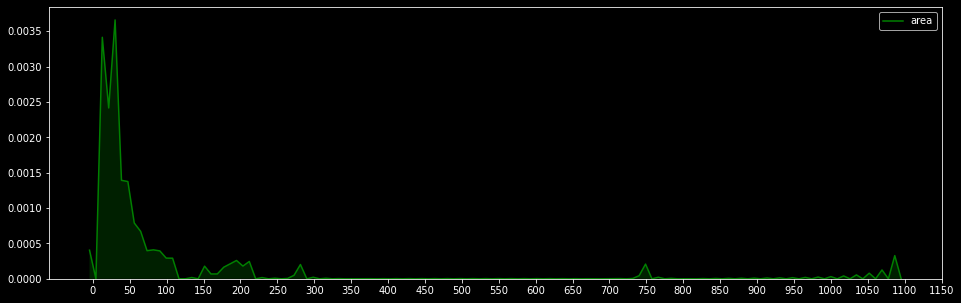

In [10]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(df[target].skew()))
print("Kurtosis: {}".format(df[target].kurtosis()))
ax = sns.kdeplot(df[target],shade=True,color='g')
plt.xticks([i for i in range(0,1200,50)])
plt.show()

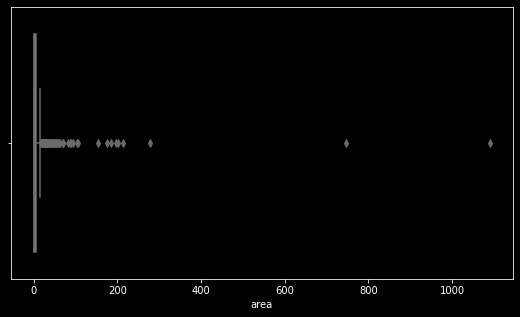

In [11]:
ax = sns.boxplot(df[target])

**Few observations:**

- The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.

- It even tells you that majority of the forest fires do not cover a large area, most of the damaged area is under 50 hectares of land.

- We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse transform before submitting the output.

- Outlier Check: There are 4 outlier instances in our area columns but the questions is should we drop it or not? (Will get back to this in the outlier treatment step)

In [12]:
# Outlier points
y_outliers = df[abs(zscore(df[target])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


### Independent columns 

In [13]:
dfa = df.drop(columns=target)
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

### Categorical columns 

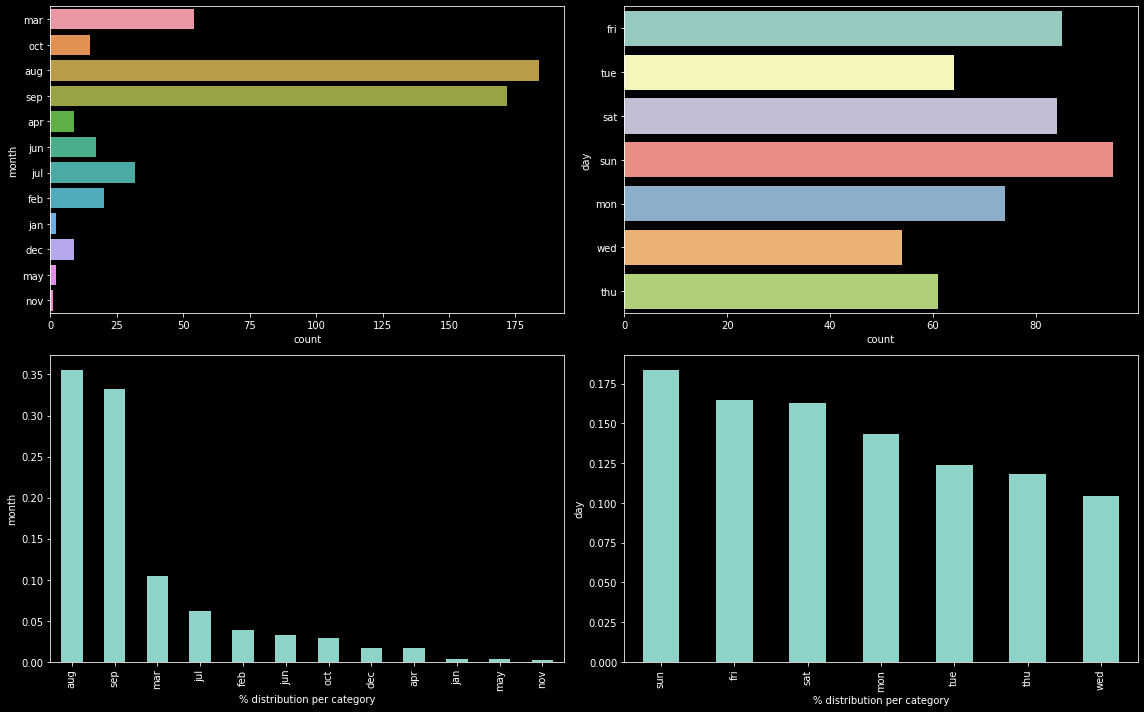

In [14]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

1. It is interesting to see that abnormally high number of the forest fires occur in the month of `August`
and `September`.

2. In the case of day, the days `Friday` to `Monday` have higher proportion of cases. (However, no strong indicators)

### Numerical Columns

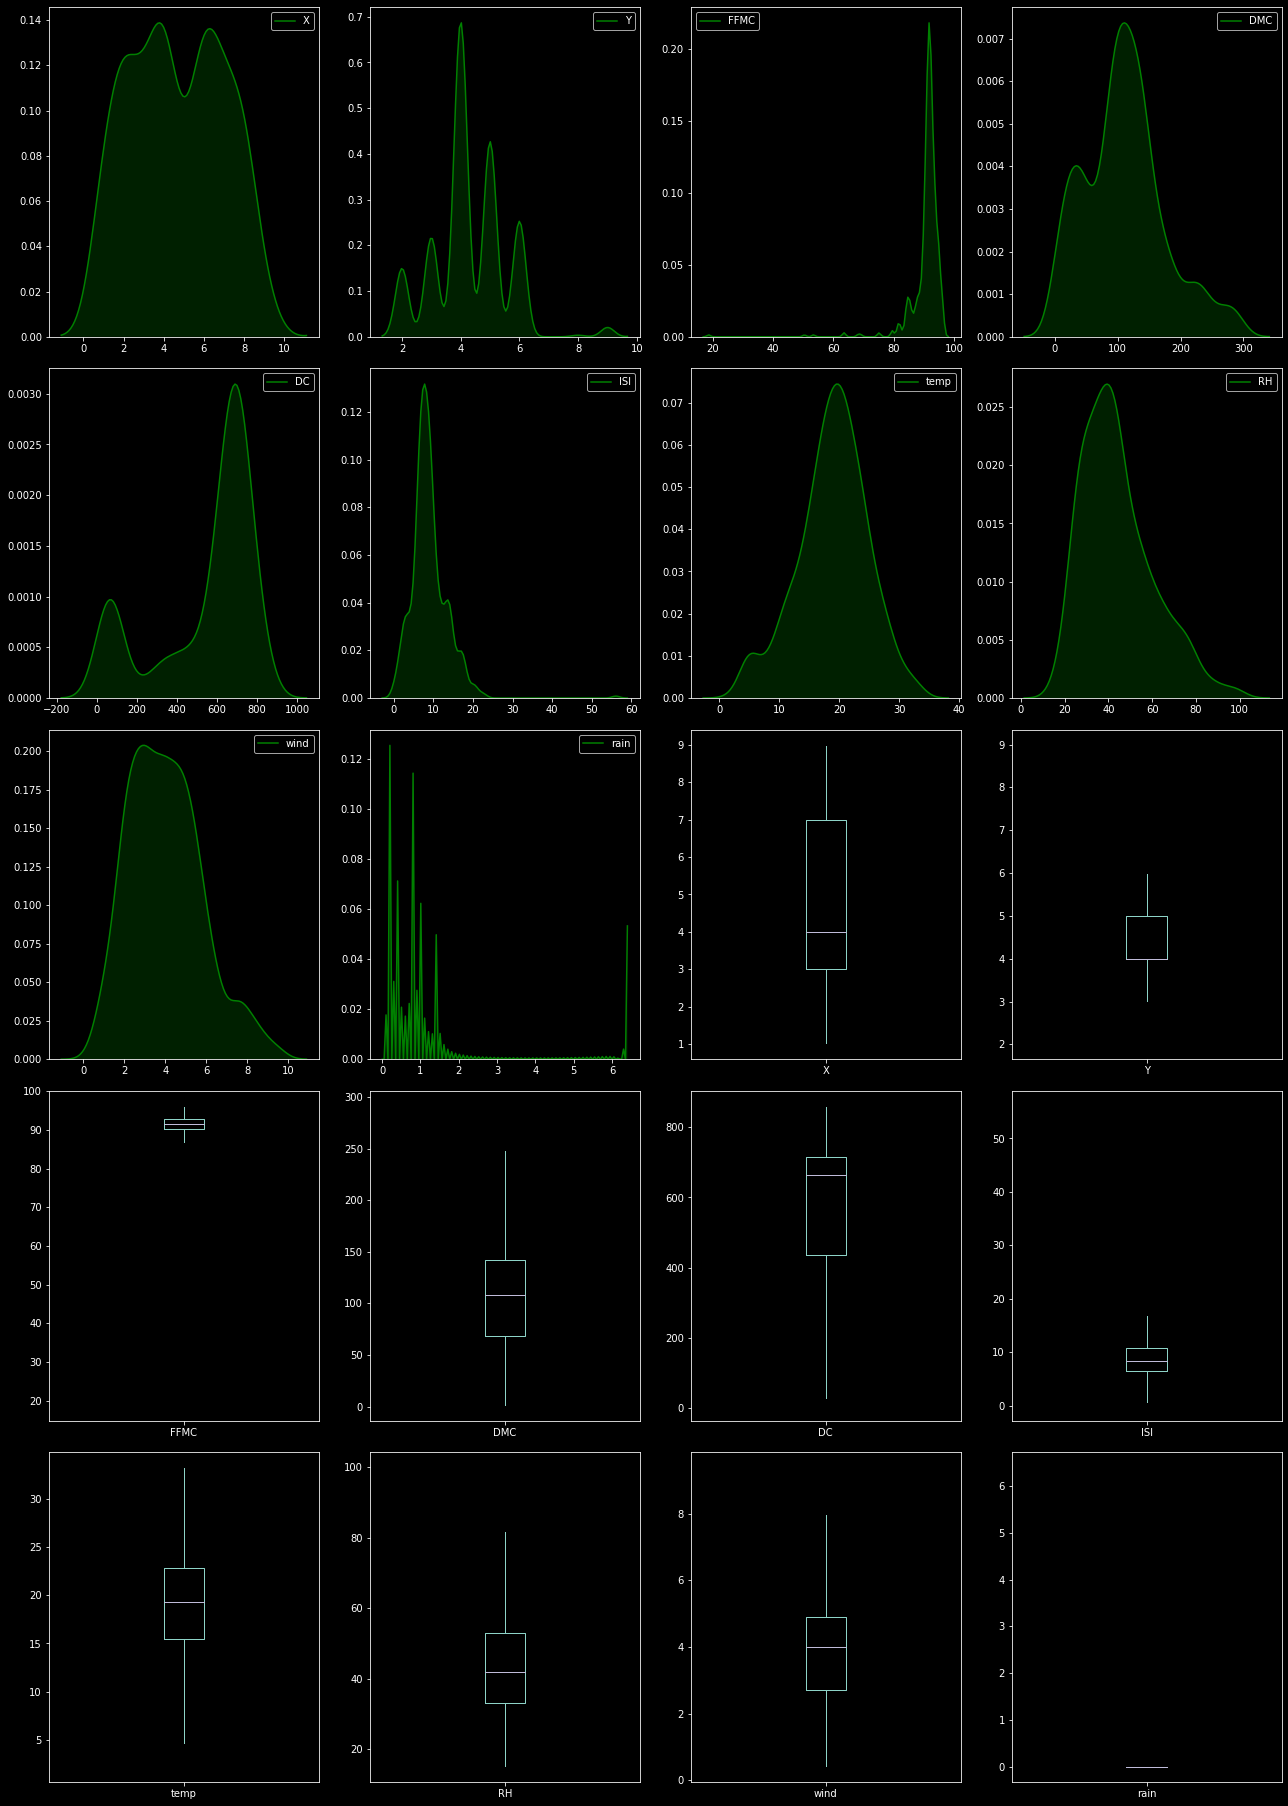

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


In [15]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

Outliers, Skewness and kurtosis (high positive or negative) was observed in the following columns:
1. FFMC
2. ISI
3. rain

---

## Bivariate analysis with our target variable

In [16]:
print(df['area'].describe(),'\n')
print(y_outliers)

count     517.000000
mean       12.847292
std        63.655818
min         0.000000
25%         0.000000
50%         0.520000
75%         6.570000
max      1090.840000
Name: area, dtype: float64 

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain     area
237  1  2   sep  tue  91.0  129.5  692.6   7.0  18.8  40   2.2   0.0   212.88
238  6  5   sep  sat  92.5  121.1  674.4   8.6  25.1  27   4.0   0.0  1090.84
415  8  6   aug  thu  94.8  222.4  698.6  13.9  27.5  27   4.9   0.0   746.28
479  7  4   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0   278.53


In [17]:
# a categorical variable based on forest fire area damage
# No damage, low, moderate, high, very high
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 1:
        return "low"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,No damage
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,No damage
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,No damage
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,No damage
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,No damage


### Categorical columns

In [18]:
cat_columns

['month', 'day']

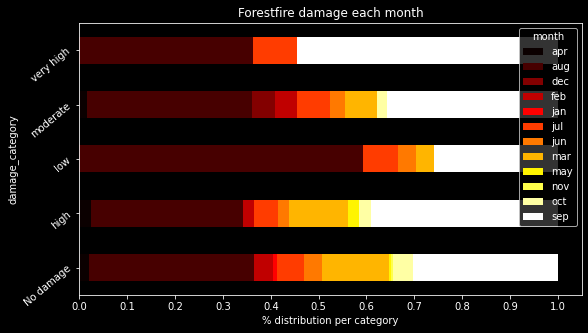

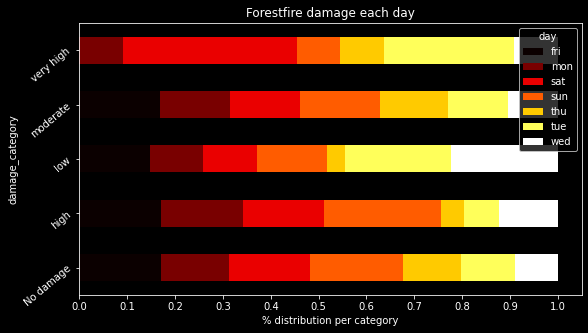

In [19]:
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

- Previously we had observed that `August` and `September` had the most number of forest fires. And from the above plot of `month`, we can understand few things
    - Most of the fires in August were low (< 1 hectare).
    - The very high damages(>100 hectares) happened in only 3 months - august,july and september.
 
- Regarding fire damage per day, nothing much can be observed. Except that, there were no ` very high` damaging fires on Friday and on Saturdays it has been reported most.

### Numerical columns

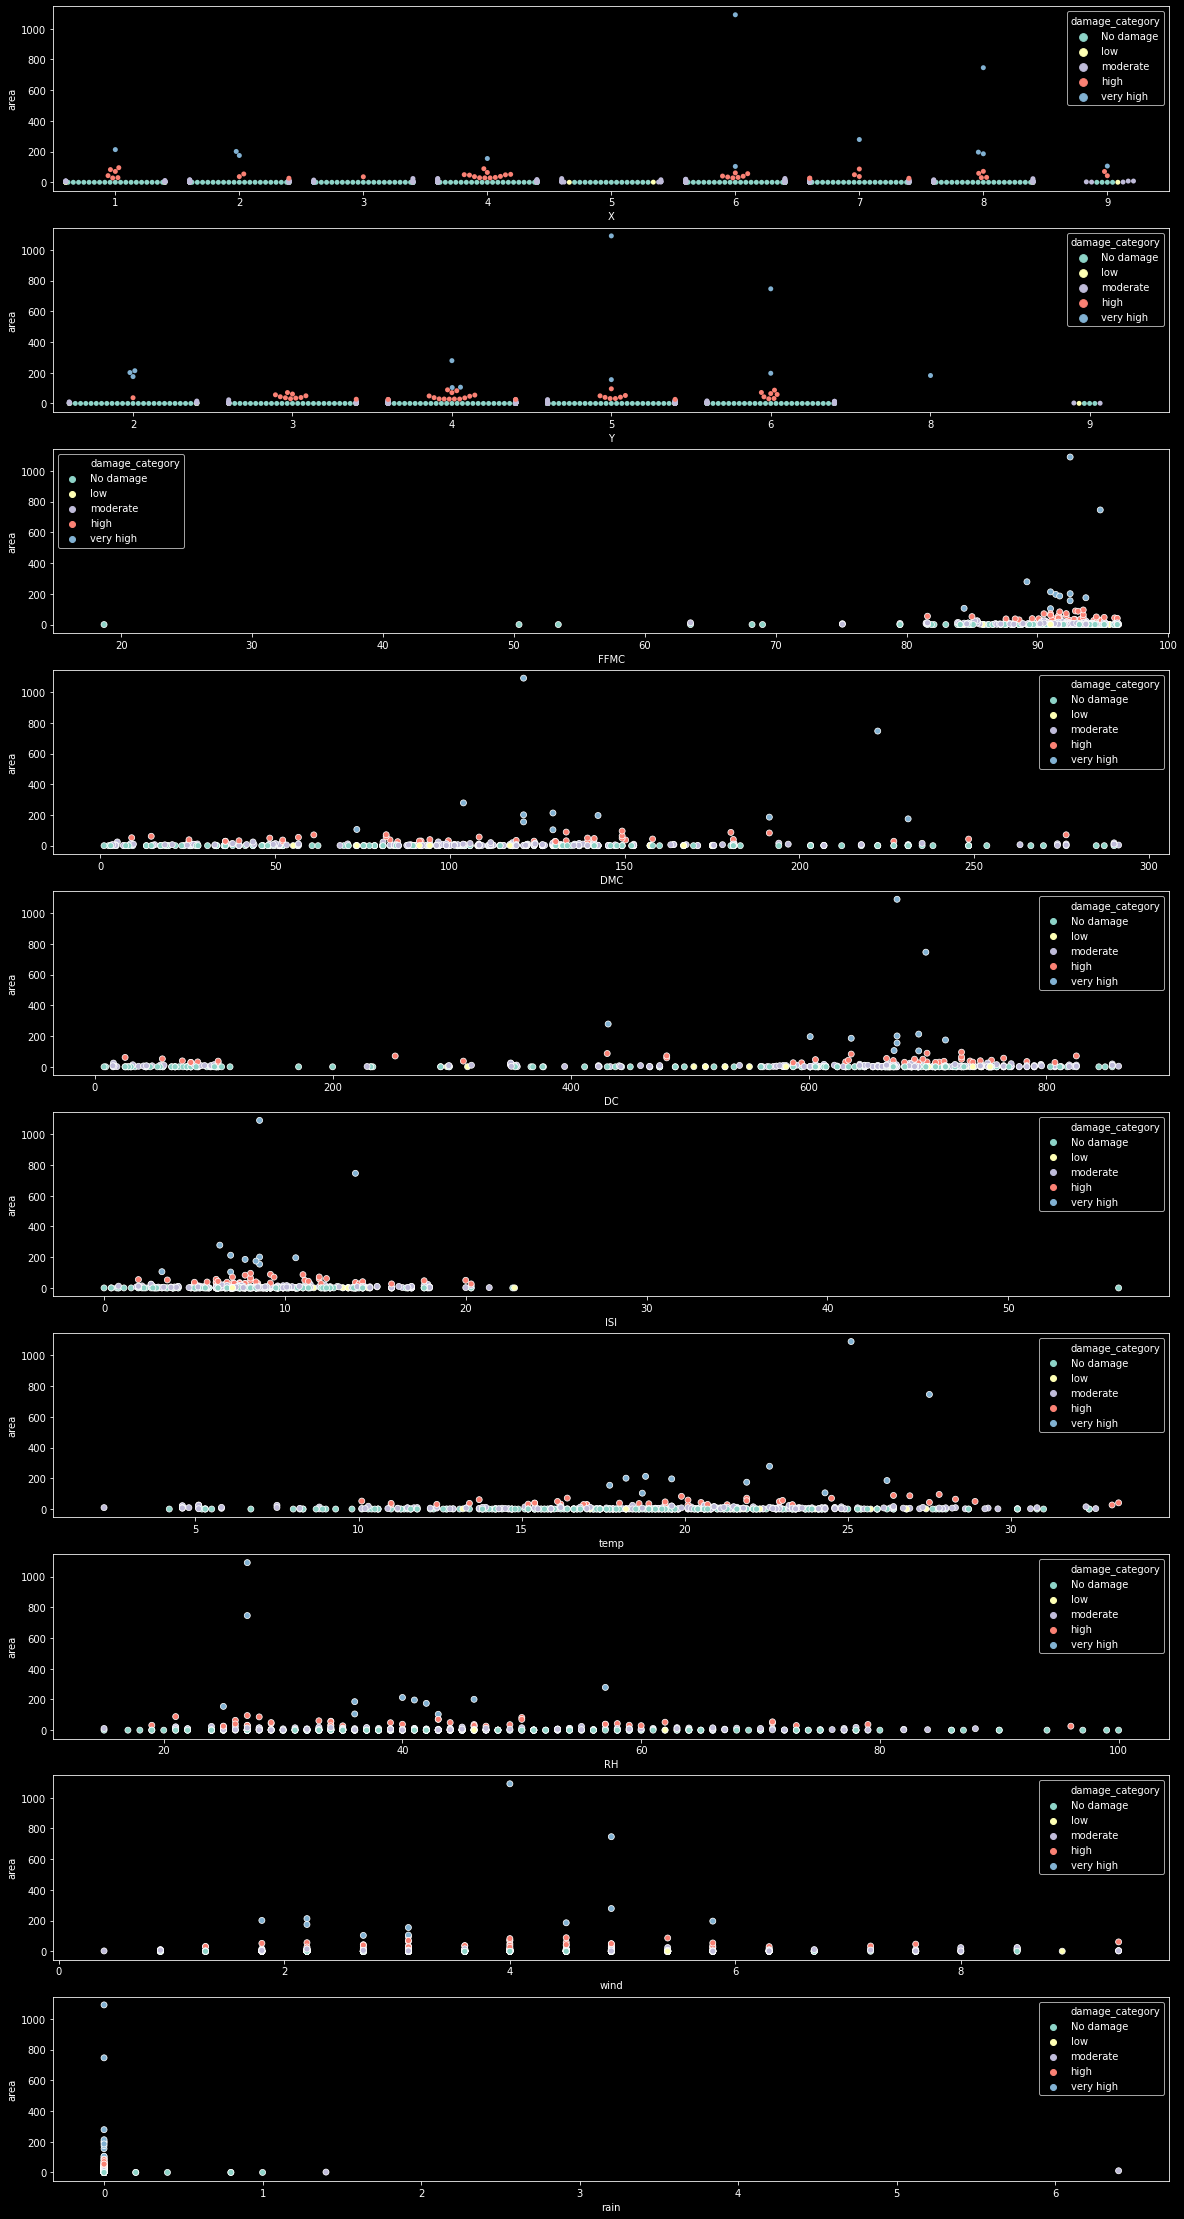

In [20]:
plt.figure(figsize=(20,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(10,1,i)
    if col in ['X','Y']:
        sns.swarmplot(data=df,x=col,y=target,hue='damage_category')
    else:
        sns.scatterplot(data=df,x=col,y=target,hue='damage_category')
plt.show()

---

## Multivariate analysis

In [21]:
selected_features = df.drop(columns=['damage_category','day','month']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


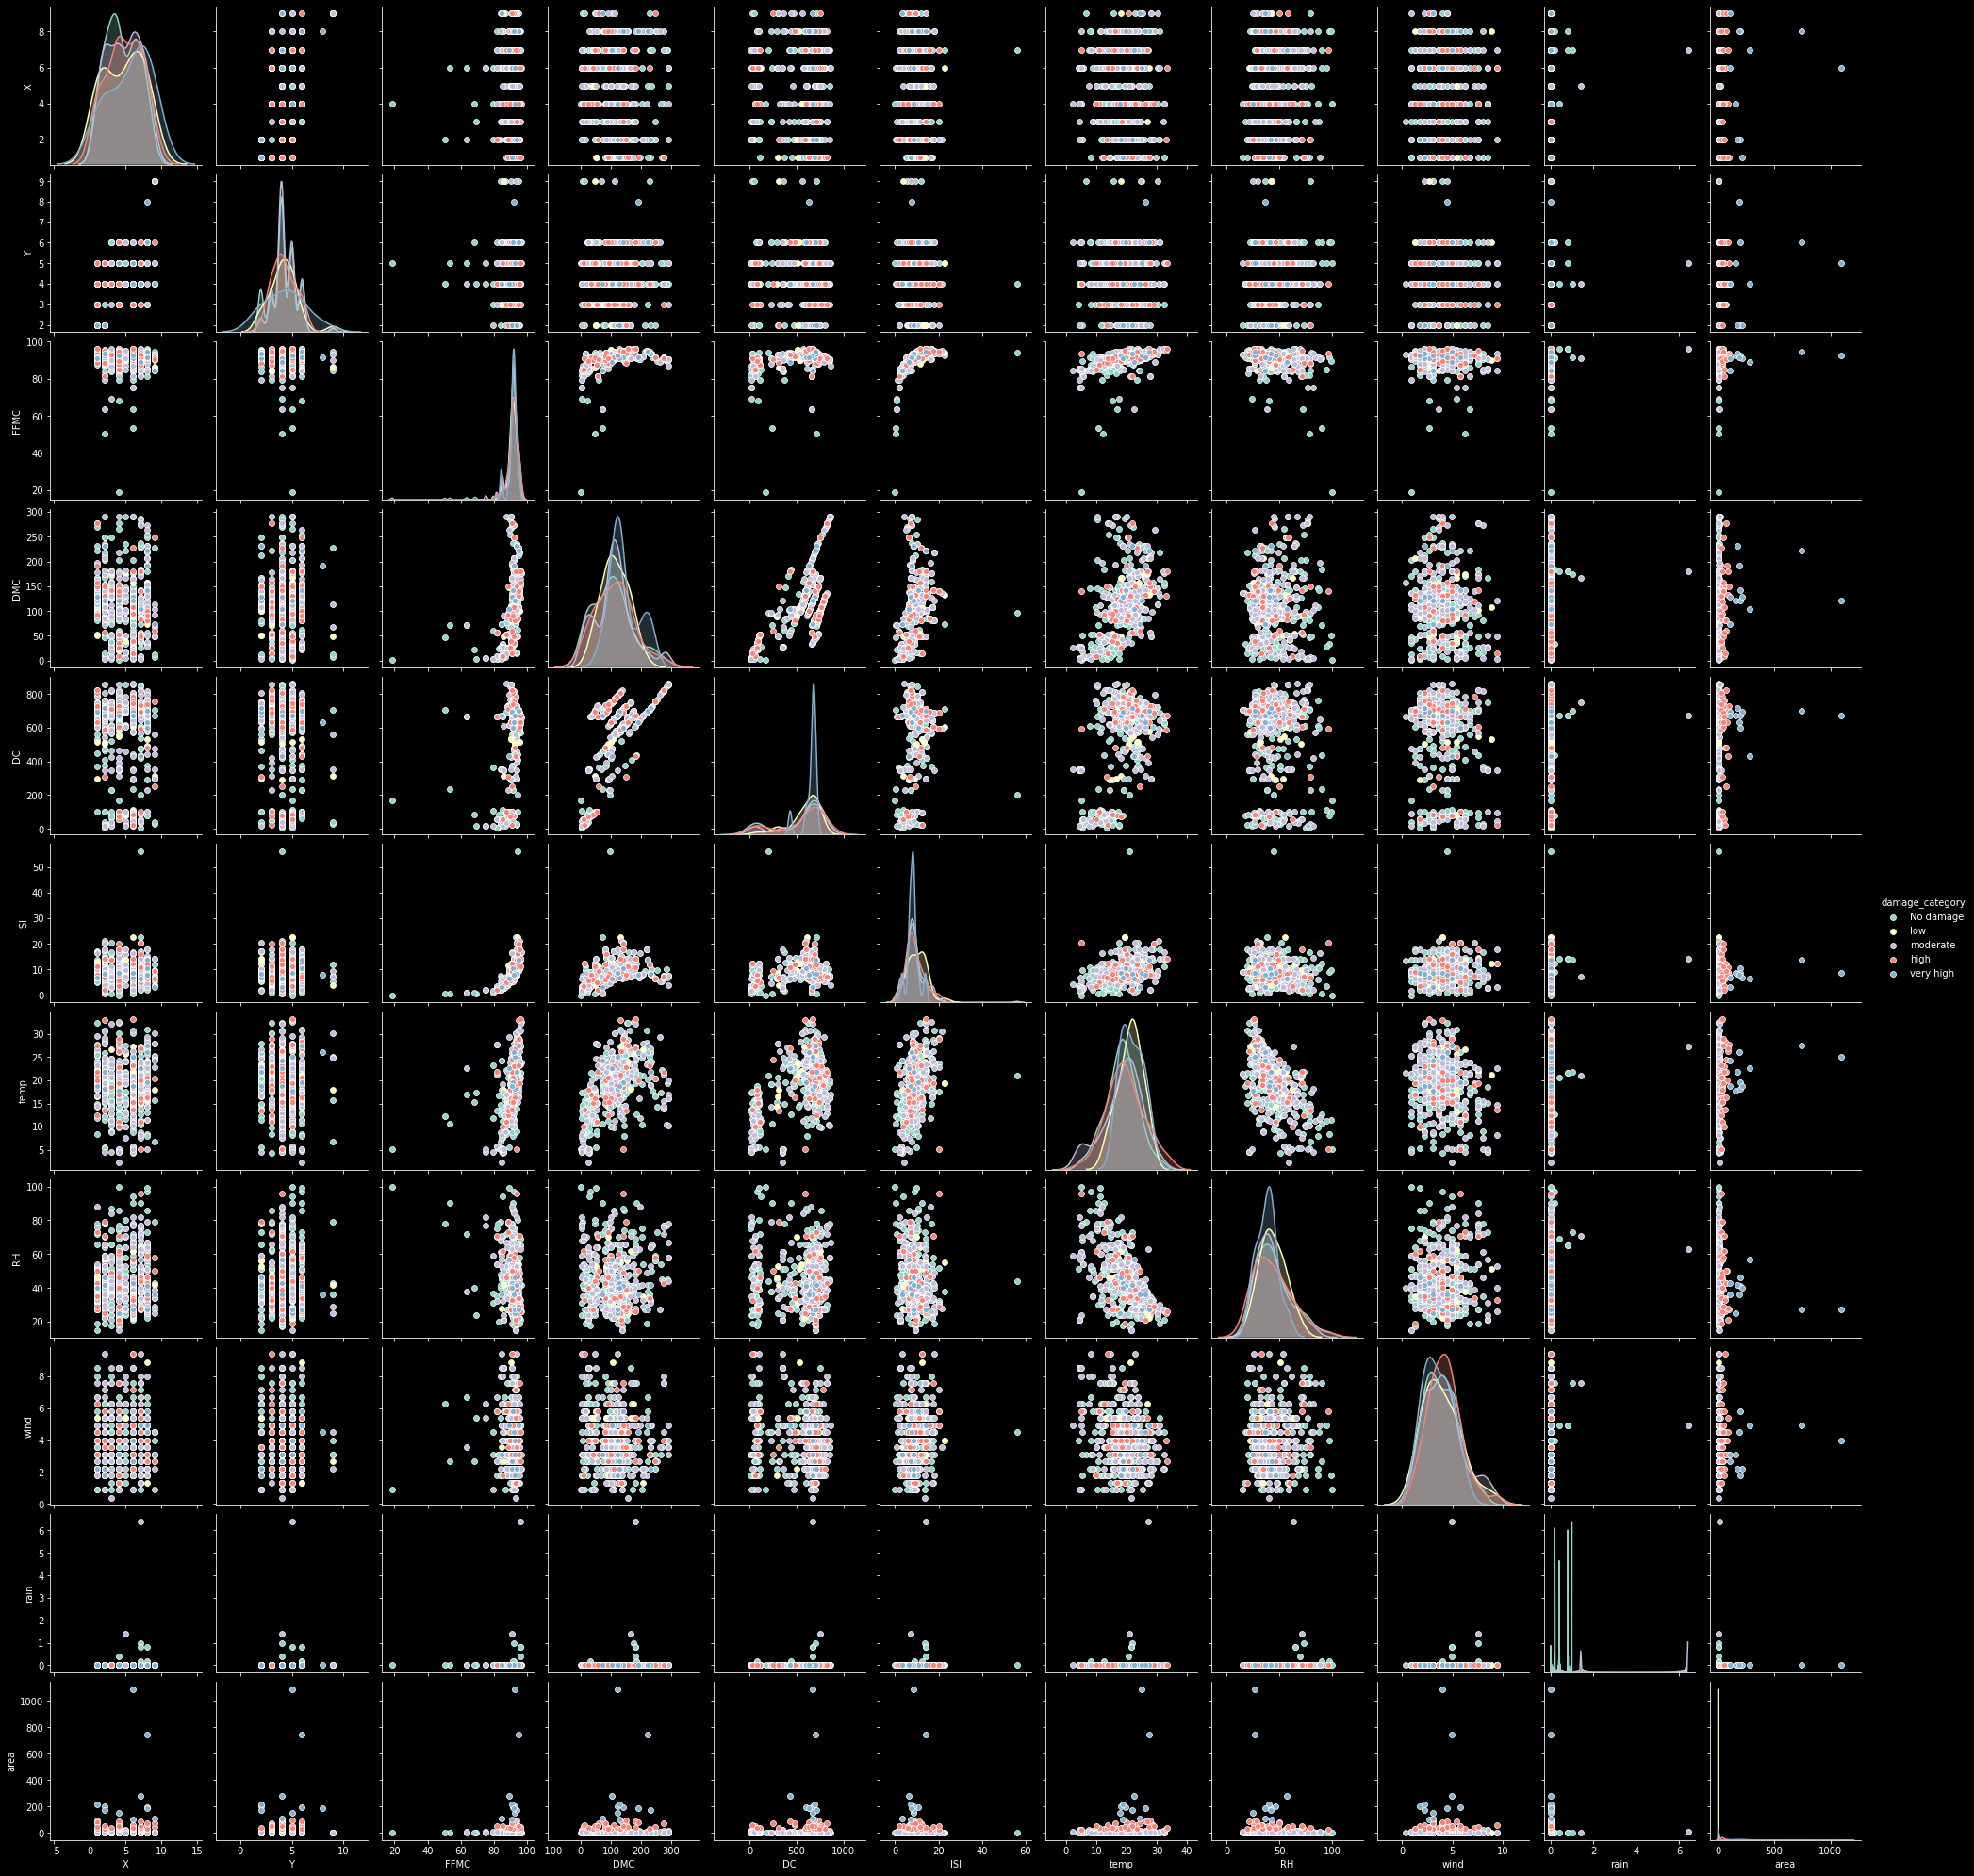

In [22]:
sns.pairplot(df,hue='damage_category',vars=selected_features)
plt.show()

---

# Outlier treatment

We had observed outliers in the following columns:
1. area 
2. FFMC
2. ISI
3. rain

In [23]:
out_columns = ['area','FFMC','ISI','rain']

However, the above outliers are not error values so we cannot remove it. 

In order to minimize the effect of outliers in our model we will transform the above features. 

**Ref:** https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/

---

# Preparing the data for modelling
Thing which we can cover here
- Encoding the categorical columns 

In [24]:
df = pd.get_dummies(df,columns=['day','month'],drop_first=True)

- Data transformations like `log,root,inverse,exponential`,etc

In [25]:
print(df[out_columns].describe())
np.log1p(df[out_columns]).skew(), np.log1p(df[out_columns]).kurtosis()

              area        FFMC         ISI        rain
count   517.000000  517.000000  517.000000  517.000000
mean     12.847292   90.644681    9.021663    0.021663
std      63.655818    5.520111    4.559477    0.295959
min       0.000000   18.700000    0.000000    0.000000
25%       0.000000   90.200000    6.500000    0.000000
50%       0.520000   91.600000    8.400000    0.000000
75%       6.570000   92.900000   10.800000    0.000000
max    1090.840000   96.200000   56.100000    6.400000


(area     1.217838
 FFMC   -11.675394
 ISI     -0.937218
 rain    14.173028
 dtype: float64, area      0.945668
 FFMC    185.482383
 ISI       2.584588
 rain    234.240025
 dtype: float64)

In [26]:
# FFMC and rain are still having high skew and kurtosis values, 
# since we will be using Linear regression model we cannot operate with such high values
# so for FFMC we can remove the outliers in them using z-score method
mask = df.loc[:,['FFMC']].apply(zscore).abs() < 3

# Since most of the values in rain are 0.0, we can convert it as a categorical column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))

df = df[mask.values]
df.shape

(510, 29)

In [27]:
out_columns.remove('rain')
df[out_columns] = np.log1p(df[out_columns])

In [ ]:
df[out_columns].skew()

area    1.208492
FFMC   -1.803993
ISI    -0.434372
dtype: float64

In [28]:
# we will use this final dataframe for building our ML model
df_ml = df.drop(columns=['damage_category']).copy()

In [29]:
df_ml.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [51]:
df_x= df_ml.loc[:, df_ml.columns != target]
df_x.head()
#select all columns except the target and damage category for Xs

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [52]:
#convert all Xs to a numpy array for training
X=df_x.to_numpy()
X.shape

(510, 27)

In [53]:
df_y=df_ml[target]
y=df_y.to_numpy()
y.shape

(510,)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(357, 27) (153, 27) (357,) (153,)


In [55]:
X_train.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
24,7,4,4.548600,139.4,594.2,3.058707,23.7,32,5.8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
235,8,6,4.526127,142.4,601.4,2.451005,19.6,41,5.8,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
269,4,4,4.533674,152.6,658.2,2.727853,19.1,53,2.7,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
212,7,4,4.557030,85.1,692.3,2.827314,20.1,47,4.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,8,6,4.535820,85.3,488.0,2.753661,22.2,29,5.4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Data Correlation

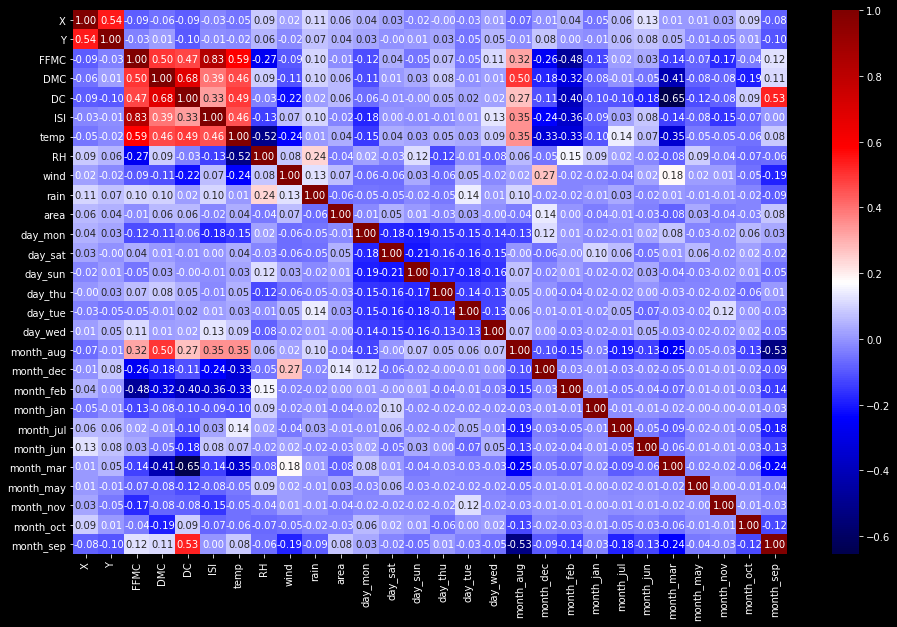

In [56]:
plt.figure(figsize =(16,10))

sns.heatmap(df_ml.corr(),annot=True,cmap='seismic',fmt=".2f",cbar=True) #'YlGnBu'
plt.show()

# Linear Regression
**In this section we will be working on Linear regression using Machine learning approach.**

In [57]:
lr = LinearRegression()
l=lr.fit(X_train, y_train)

print(f'Intercept: {lr.intercept_}')
print(f'R^2 score: {lr.score(X_test, y_test)}')
pd.DataFrame({"Coefficients": lr.coef_}, index=X_train.columns)

Intercept: -3.857082545192392
R^2 score: -0.00507385224340573


,Coefficients
X,0.029296
Y,-0.004658
FFMC,0.966748
DMC,0.004984
DC,-0.002454
ISI,-0.271599
temp,0.039082
RH,0.003179
wind,0.058834
rain,-0.733901


# Improving ML model

You can always improve your Machine Learning Models by performing improvement techniques such as preprocessing, feature selection, feature engineering, dimensionality reduction etc. This step is customizable and can be improved substantially, or you can ignore this step.

## Feature Selection techniques

The following can be used for selecting relevant features for model building

1. **Using Pearson Correlation**
2. **Wrapper method** 
    1. Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

In [66]:
X_m, y_m = df_ml.drop(columns=[target]), df_ml[target]

### RFE

Out of 27 features, best number of features 1


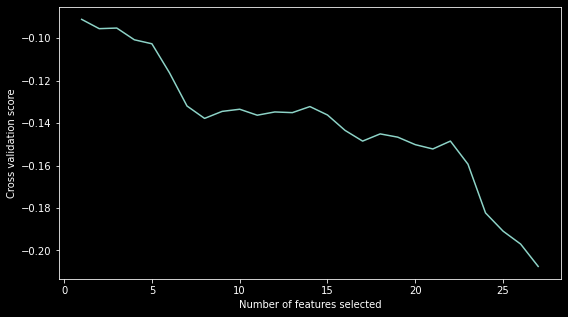

In [67]:
# RFECV is a variant with inbuilt Cross validation
model = LinearRegression()
selector = RFECV(model,cv=5)
selector = selector.fit(X_m, y_m)
print(f"Out of {len(X_m.columns)} features, best number of features {selector.n_features_}")
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X_m.columns) + 1), selector.grid_scores_)
plt.show()

Out of 27 features, best number of features 19
['X' 'wind' 'rain' 'day_mon' 'day_sat' 'day_sun' 'day_thu' 'day_tue'
 'day_wed' 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct']


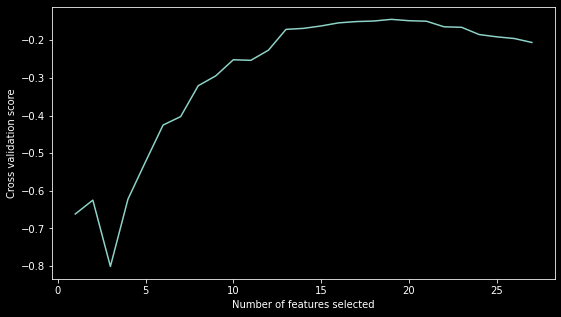

In [68]:
# In our stats method we found that the intercept was not relevant 
# Let's try that feature out in our ML model
model = LinearRegression(fit_intercept=False)
selector = RFECV(model,cv=5)
selector = selector.fit(X_m, y_m)
print(f"Out of {len(X_m.columns)} features, best number of features {selector.n_features_}")

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(X_m.columns) + 1), selector.grid_scores_)
print(X_m.columns[selector.support_].values)
plt.show()

**Building model with the best features and checking the R2 score for the same**

In [69]:
mask = selector.support_
print(f"Best features according to RFE {X_m.columns[mask].values}")

X_m1 = X_m.iloc[:,mask]
# We could have used train test split or cross validation strategies
# for scoring the model but in order to compare with the stats model 
# we will use the whole data
model1 = LinearRegression().fit(X_m1,y_m)
print(f"R2 Score: {model1.score(X_m1,y_m)}")

Best features according to RFE ['X' 'wind' 'rain' 'day_mon' 'day_sat' 'day_sun' 'day_thu' 'day_tue'
 'day_wed' 'month_aug' 'month_dec' 'month_feb' 'month_jan' 'month_jul'
 'month_jun' 'month_mar' 'month_may' 'month_nov' 'month_oct']
R2 Score: 0.05542824436801641


### Forward Selection

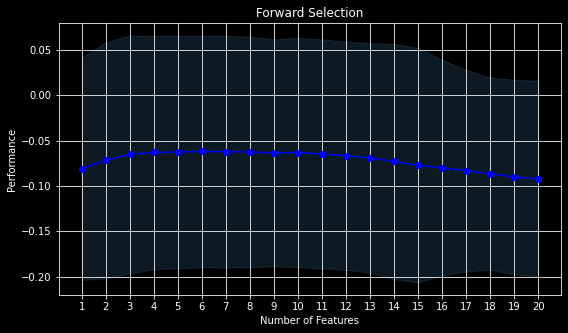

In [70]:
model = LinearRegression(fit_intercept=False)
sfs1 = sfs(model,k_features=20,forward=True,scoring='r2',cv=5)
sfs1.fit(X_m,y_m)
fig = plot_sfs(sfs1.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()

In [72]:
print(sfs1.k_features, sfs1.k_feature_names_,sep="\n")

20
('X', 'FFMC', 'ISI', 'RH', 'wind', 'rain', 'day_mon', 'day_sat', 'day_sun', 'day_thu', 'day_tue', 'day_wed', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_mar', 'month_nov', 'month_oct')


In [73]:
index = list(sfs1.k_feature_idx_)
X_m1 = X_m.iloc[:,index]
model1 = LinearRegression().fit(X_m1,y_m)
print(f"R2 Score: {model1.score(X_m1,y_m)}")

R2 Score: 0.054721988510710196


## Regularization
1. Lasso
2. Ridge
3. ElasticNet


### Ridge

In [76]:
# higher the alpha value, more restriction on the coefficients; 
# lower the alpha > more generalization, coefficients are barely
rr = RidgeCV(cv=5,fit_intercept=False) 
rr.fit(X_m, y_m)
rr.score(X_m,y_m)

0.0605551966881519

In [77]:
rr.alpha_

10.0

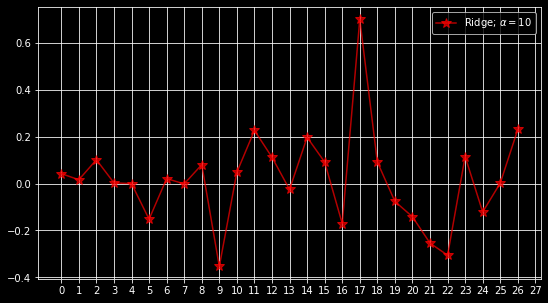

In [78]:
plt.plot(rr.coef_,alpha=0.7,marker='*',markersize=10,color='red',label=r'Ridge; $\alpha =10$') 
plt.grid(True)
plt.xticks(range(0,28,1))
plt.legend()
plt.show()

# Model Accuracy Metrics

You must use the Mean Squared Error & Mean Absolute Error for your model evaluations. You may also include extra metrics for calculating the scores.

In [78]:
def MSE(model_preds, ground_truths):
  return "Your code here"

def MAE(model_preds, ground_truths):
  return "Your code here"

def Other_Err(model_preds, ground_truths):
  return "Your code here"

# Metric Reports
Report your metrics in the following manner : 

| Metrics 	| Values 	| Comments 	|
|-	|-	|-	|
| MSE 	| 3.80 	| A 	|
| MAE 	| 1.00 	| B 	|
| Others 	| 1.35 	| C 	|

# Final Note

You can also provide drive links to saved model files along with their working notebook demos like this :

View the drive source for this file here : [Submission_Template.ipynb](https://drive.google.com/drive/folders/1nkpvgPF3SrDe-a0NAXkTTaxBtaewCuus?usp=sharing)